# Crab Age Features
*Sex: Male, Female, Indeterminate  
*Length: Length of the Crab in ft  
*Diameter: Diameter of the Crab in ft  
*Height: Height of the Crab in ft  
*Weight: Weight of the Crab in ounces  
*Shucked Weight: Weight without the Shell in ounce  
*Viscera Weight: is weight that wraps around your abdominal organs deep inside body (in ounces)
*Shell Weight: Weight of the shell  
*Age: Age of the Crab

In [1]:
from warnings import filterwarnings 
filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot,plot
from sklearn.linear_model import LinearRegression
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest,mutual_info_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import PolynomialFeatures

In [3]:
dataset = pd.read_csv("archive.zip")
dataset.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


In [4]:
data = dataset.copy()

In [5]:
data.shape

(3893, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


In [7]:
data.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000
mean,1.311306,1.020893,0.349374,23.567275,10.207342,5.136546,6.795844,9.954791
std,0.300431,0.248233,0.104976,13.891201,6.275275,3.104133,3.943392,3.220967
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000
25%,1.125000,0.875000,0.287500,12.672227,5.343881,2.664853,3.713785,8.000000
50%,1.362500,1.062500,0.362500,22.792998,9.539607,4.861939,6.662133,10.000000
75%,1.537500,1.200000,0.412500,32.786197,14.273973,7.200773,9.355335,11.000000
max,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


In [8]:
data[data.duplicated()]

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age


In [9]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

In [10]:
cat = data.select_dtypes('object').columns.to_numpy()
numeric = data.select_dtypes('number').columns.to_numpy()

In [11]:
cat

array(['Sex'], dtype=object)

In [12]:
numeric

array(['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age'], dtype=object)

In [14]:
print("Number of Unique Values in {} is: {}\nunique values: {}".format(cat[0],data[cat].nunique()[0],np.unique(data[cat])))

Number of Unique Values in Sex is: 3
unique values: ['F' 'I' 'M']


In [17]:
for f in numeric:
    print(f"{f} Range: [{data[f].min()} - {data[f].max()}]")
    print('*'*50)

Length Range: [0.1875 - 2.0375]
**************************************************
Diameter Range: [0.1375 - 1.625]
**************************************************
Height Range: [0.0 - 2.825]
**************************************************
Weight Range: [0.056699 - 80.10151225]
**************************************************
Shucked Weight Range: [0.0283495 - 42.184056]
**************************************************
Viscera Weight Range: [0.01417475 - 21.54562]
**************************************************
Shell Weight Range: [0.04252425 - 28.4912475]
**************************************************
Age Range: [1 - 29]
**************************************************


In [19]:
data = data[~(data["Height"] == 0)]

In [25]:
for f in numeric:
    q1 = data[f].quantile(0.05)
    q3 = data[f].quantile(0.95)
    iqr = q3-q1
    lf = q1 - 1.5 * iqr
    uf = q3 + 1.5 * iqr
    if (data[f] < lf).any() | (data[f] > uf).any():
        print(f"{f} has an outliers")
    else:
        print(f"{f} doesn't have an outliers")

Length doesn't have an outliers
Diameter doesn't have an outliers
Height has an outliers
Weight doesn't have an outliers
Shucked Weight doesn't have an outliers
Viscera Weight doesn't have an outliers
Shell Weight doesn't have an outliers
Age doesn't have an outliers


In [28]:
q1 = data["Height"].quantile(0.05)
q3 = data["Height"].quantile(0.95)
iqr = q3 - q1
lf = q1 - 1.5 * iqr
uf = q3 + 1.5 * iqr
data = data[~(data["Height"] < lf) | (data["Height"] > uf)]

In [29]:
data.shape

(3891, 9)

In [30]:
data.reset_index(inplace=True,drop=True)

In [32]:
data.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


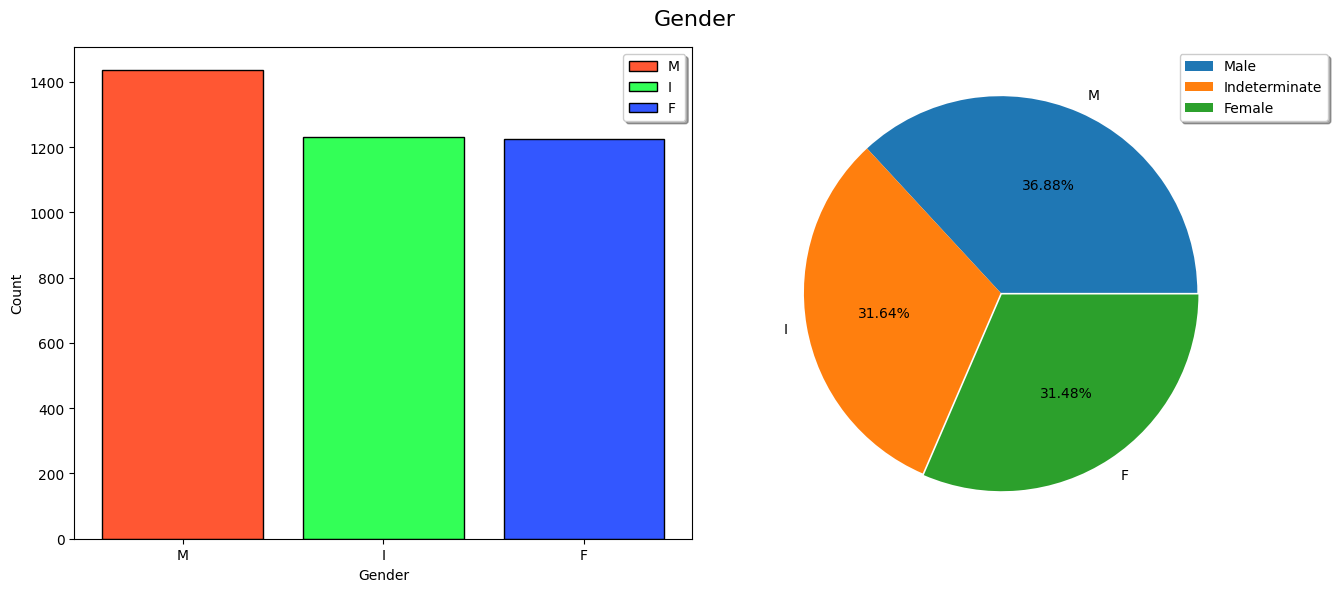

In [33]:
gender_ratio = data['Sex'].value_counts()
plt.figure(figsize=(14,6))
plt.suptitle("Gender",fontsize=16)
plt.subplot(1,2,1)
plt.bar(x=gender_ratio.index,height=gender_ratio.values,label=gender_ratio.index,color=['#FF5733', '#33FF57', '#3357FF'],edgecolor='black')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(shadow=True)
plt.subplot(1,2,2)
plt.pie(gender_ratio.values,labels=gender_ratio.index,explode=[0,0,0.01],autopct="%.2f%%")
plt.legend(shadow=True,labels=["Male","Indeterminate","Female"],bbox_to_anchor=[0.85,1])
plt.tight_layout()
plt.show()

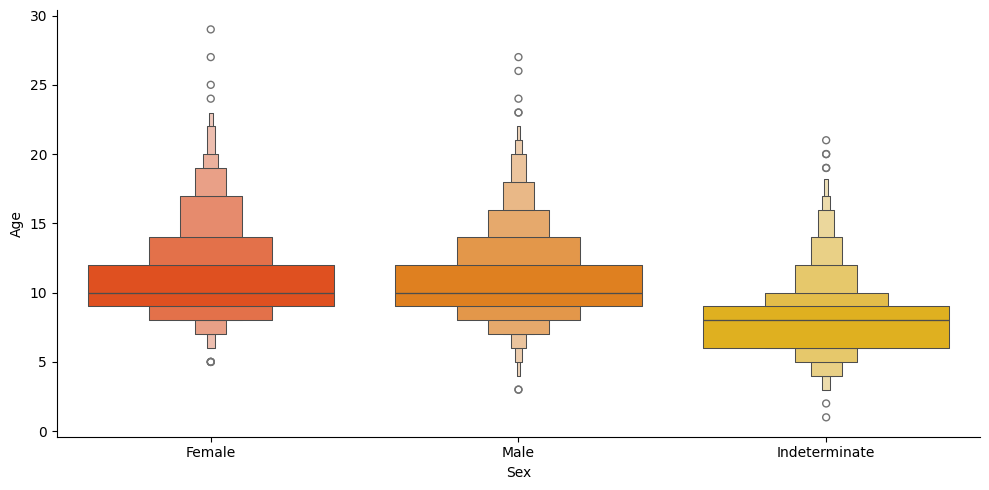

In [34]:
sns.catplot(data=data,x='Sex',y='Age',kind='boxen',palette='autumn',height=5,aspect=2).set_xticklabels(["Female","Male","Indeterminate"])

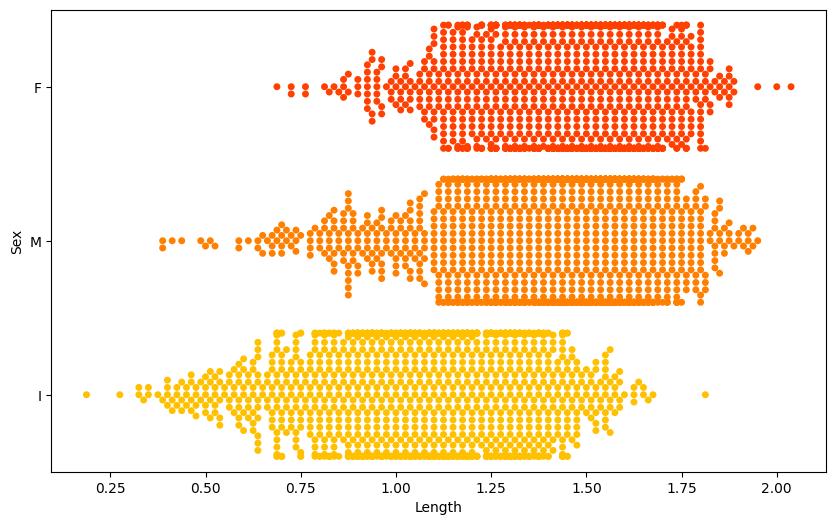

<Figure size 800x1200 with 0 Axes>

In [35]:
fig, ax = plt.subplots(figsize=(10,6))
plt.figure(figsize=(8,12))
sns.swarmplot(data=data,x='Length',y='Sex',palette='autumn',ax=ax)
plt.show()

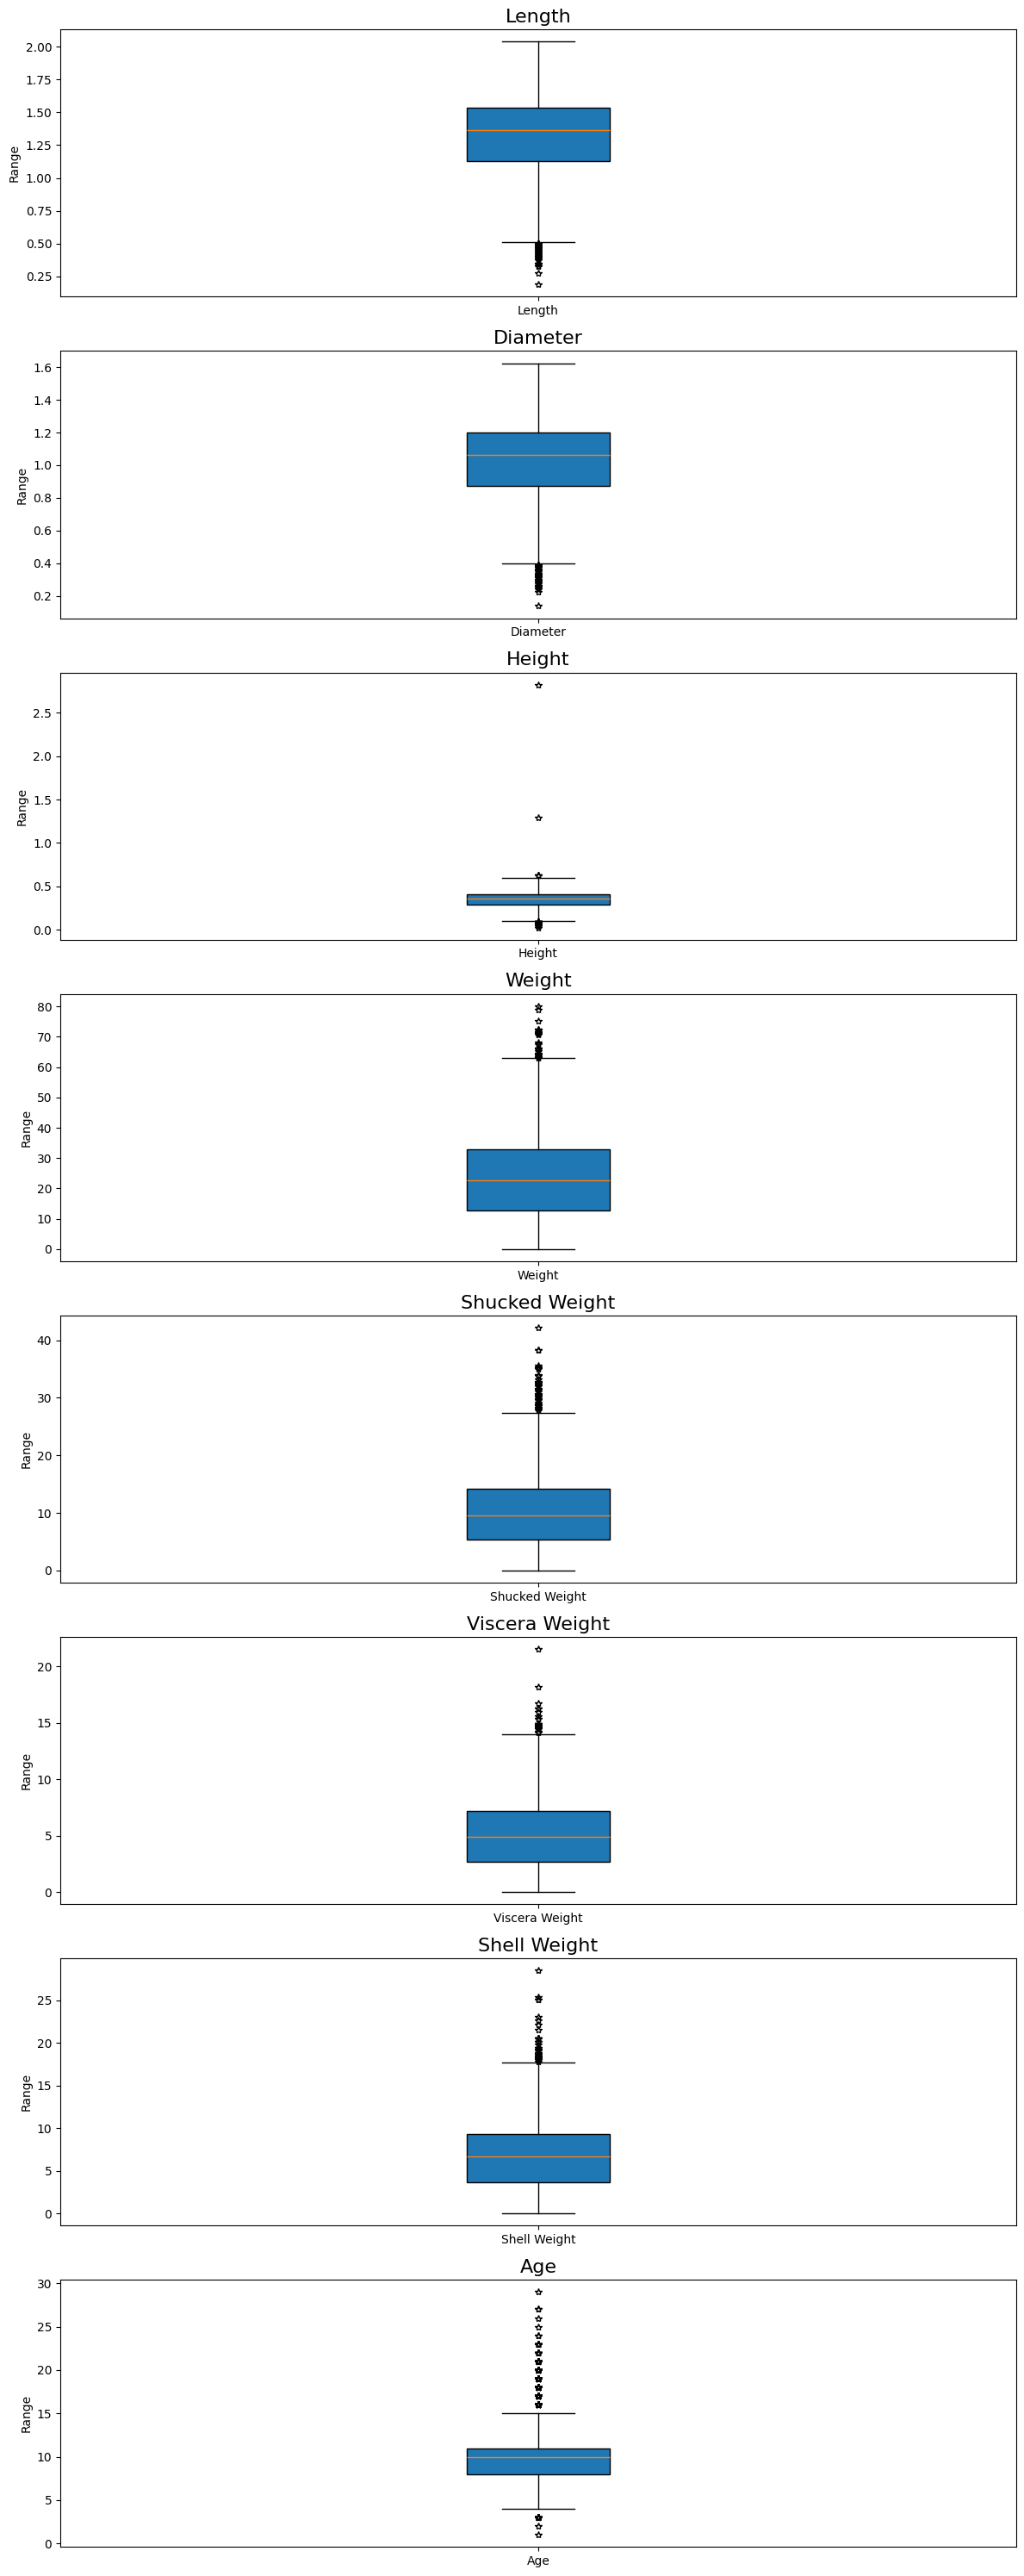

In [36]:
f,ax = plt.subplots(len(numeric),1,figsize=(12,30))
i = 0
for f in numeric:
    ax[i].set_title(f,fontsize=16)
    ax[i].boxplot(data[f],sym='*',patch_artist=True)
    ax[i].set_xticks([1],[f])
    ax[i].set_ylabel("Range")
    i += 1
plt.tight_layout()
plt.show()

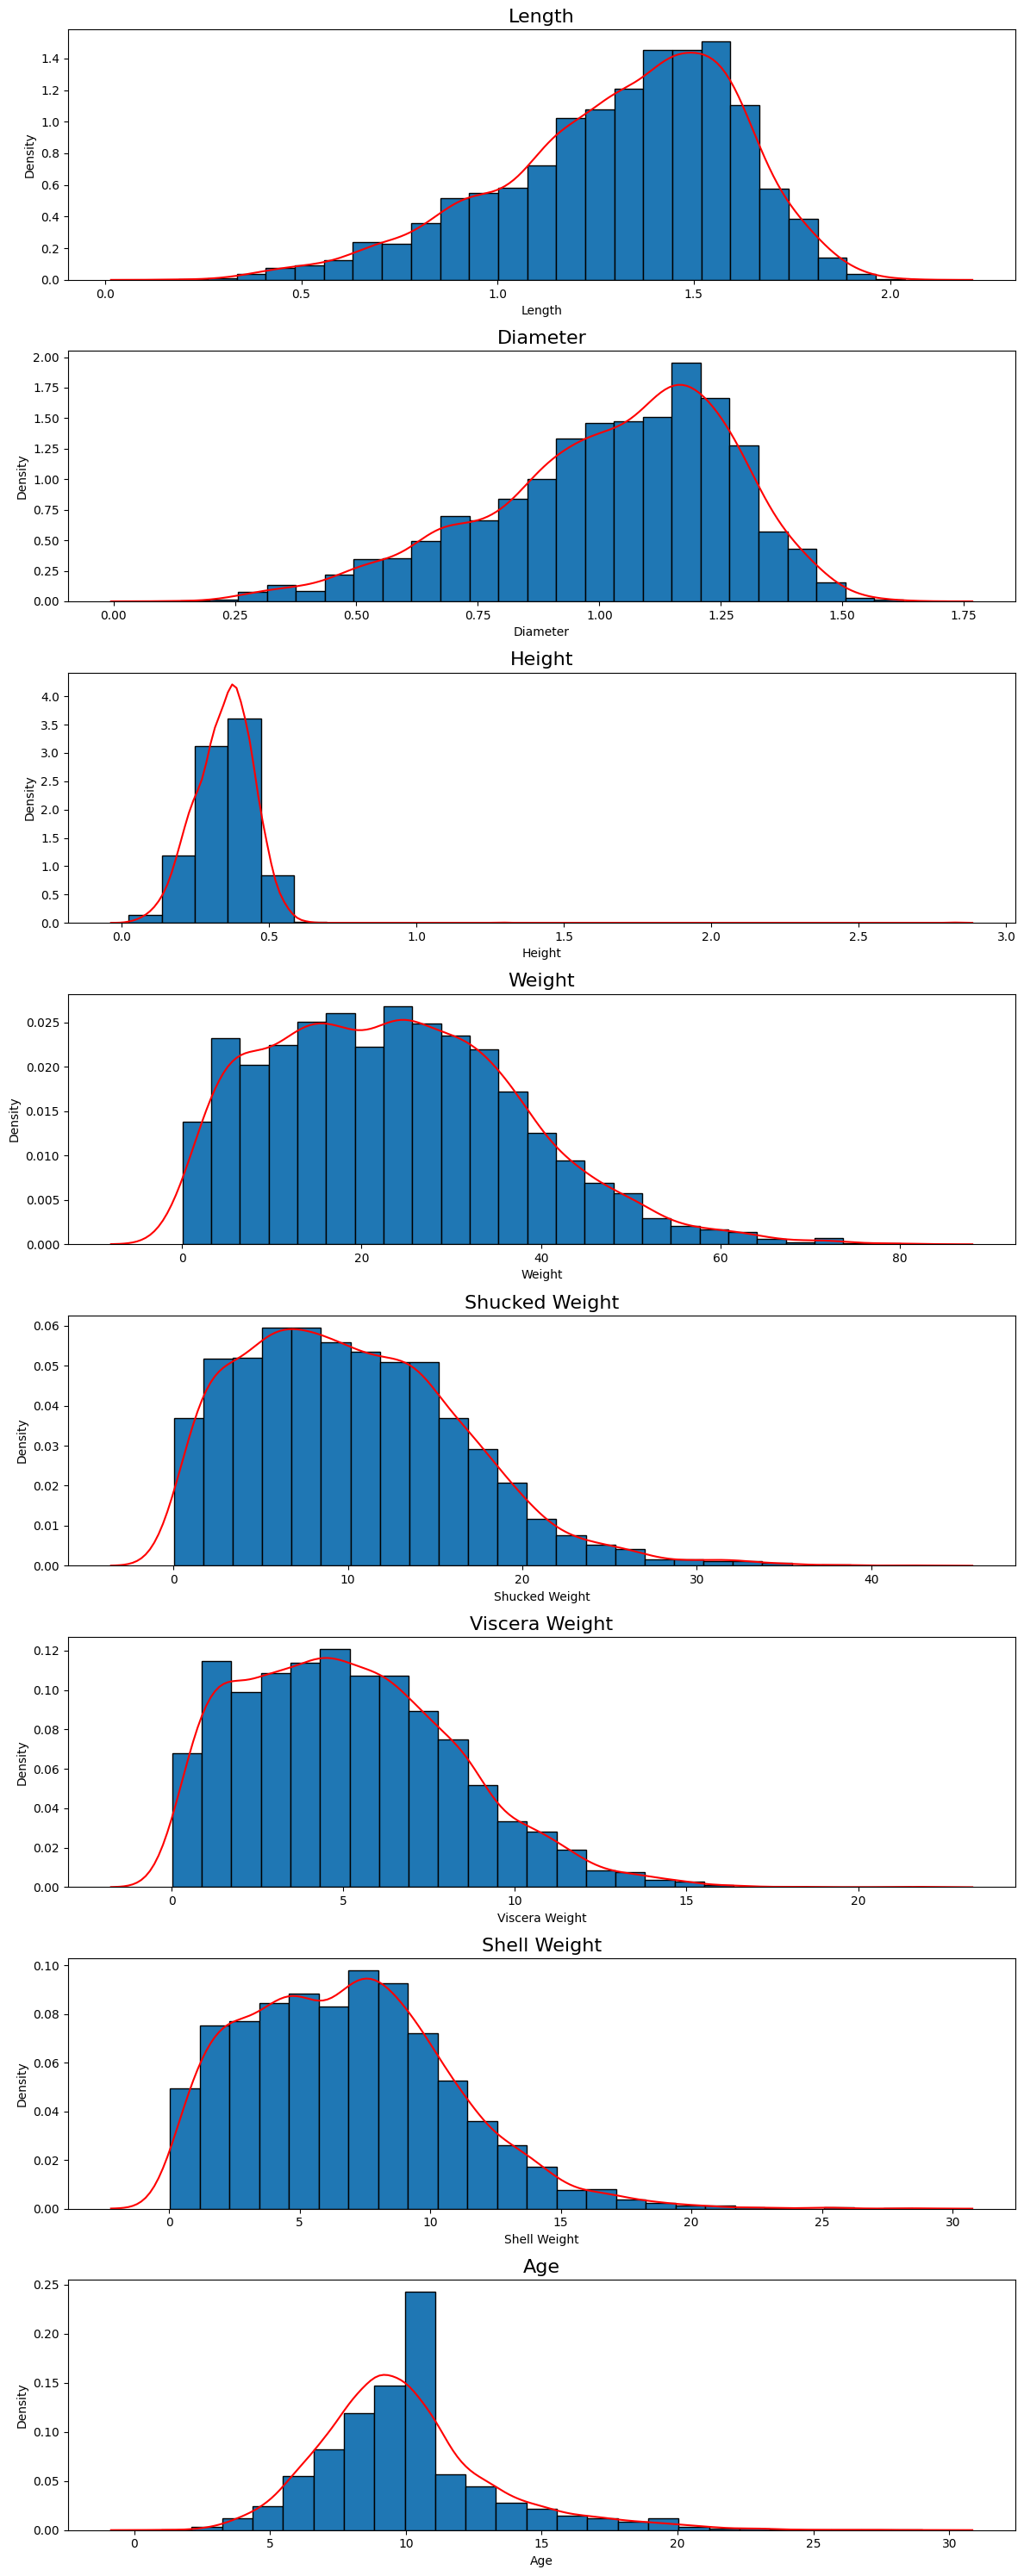

In [37]:
f,ax = plt.subplots(len(numeric),1,figsize=(12,30))
i = 0
for f in numeric:
    ax[i].set_title(f,fontsize=16)
    ax[i].hist(data[f],bins=25,edgecolor='black',density=True)
    sns.kdeplot(data=data,x=f,color='red',ax=ax[i])
    ax[i].set_xlabel(f)
    ax[i].set_ylabel("Density")
    i += 1
plt.tight_layout()
plt.show()

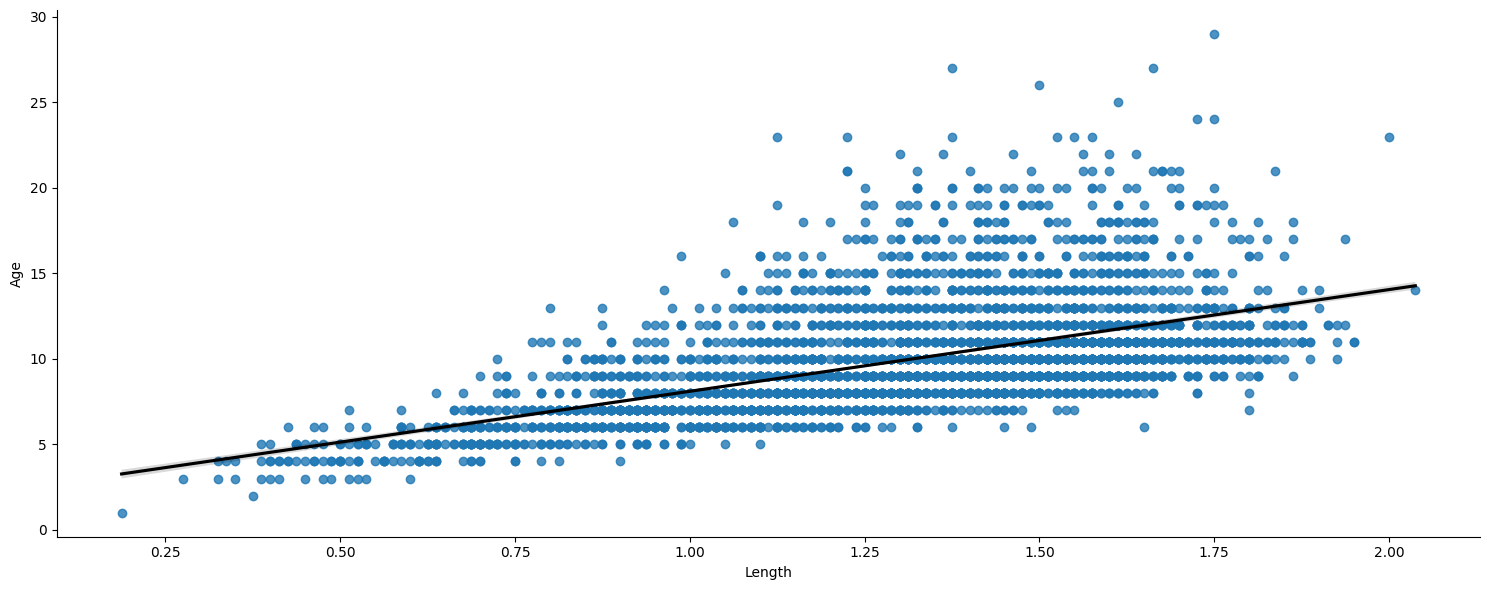

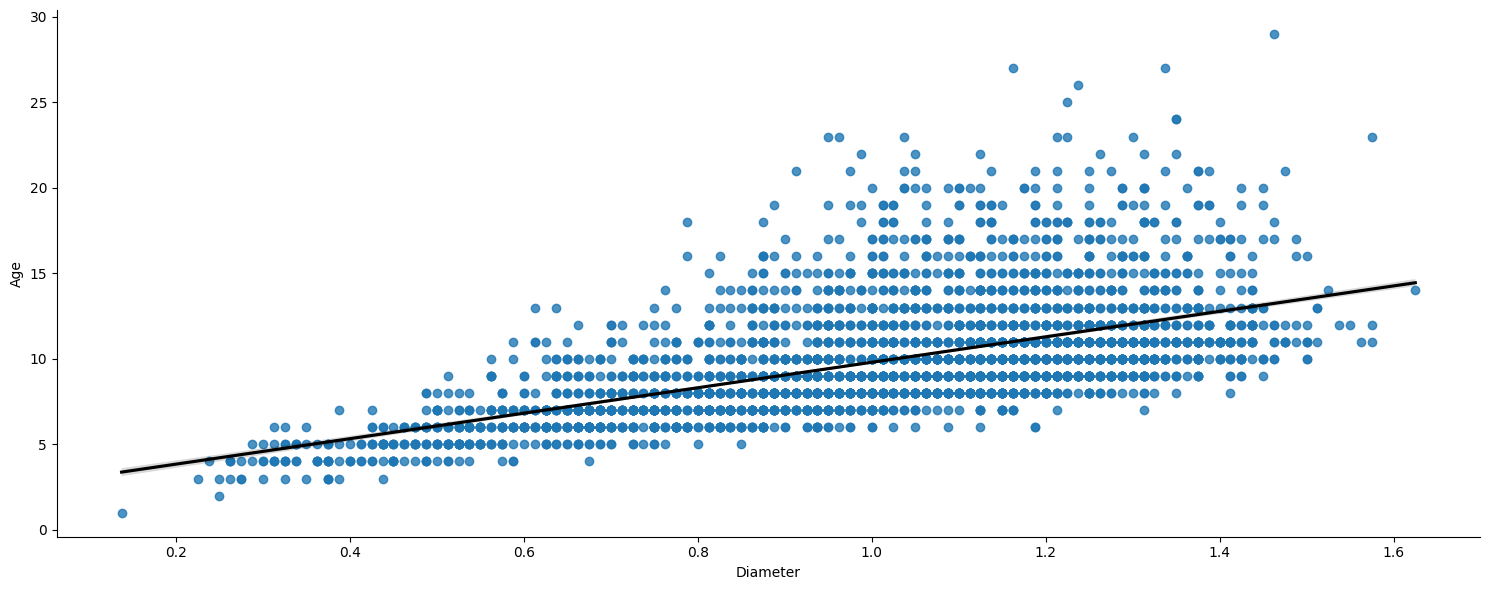

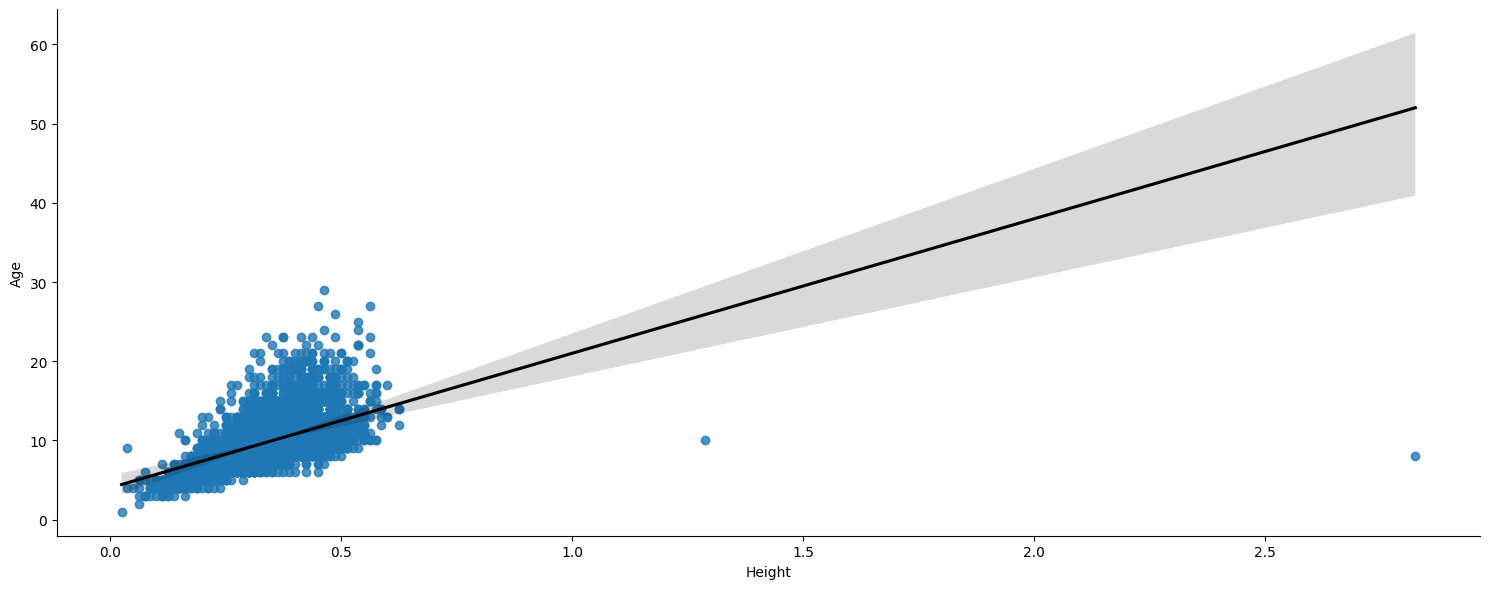

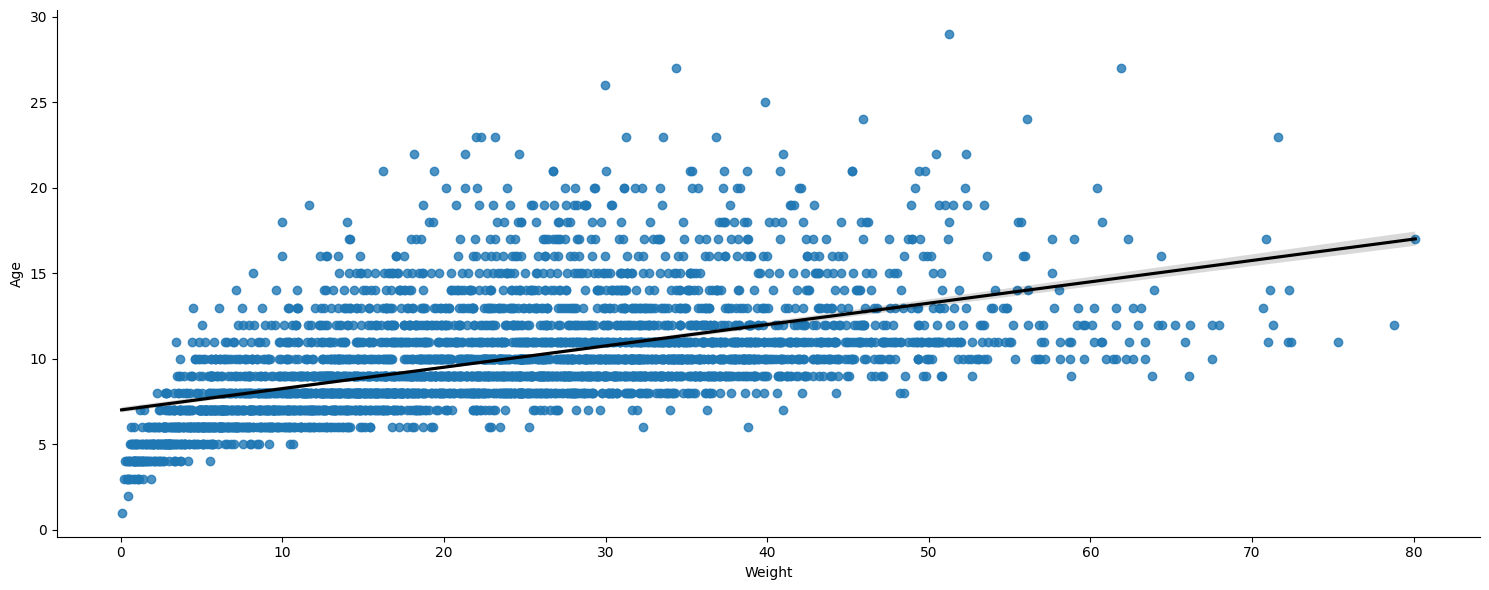

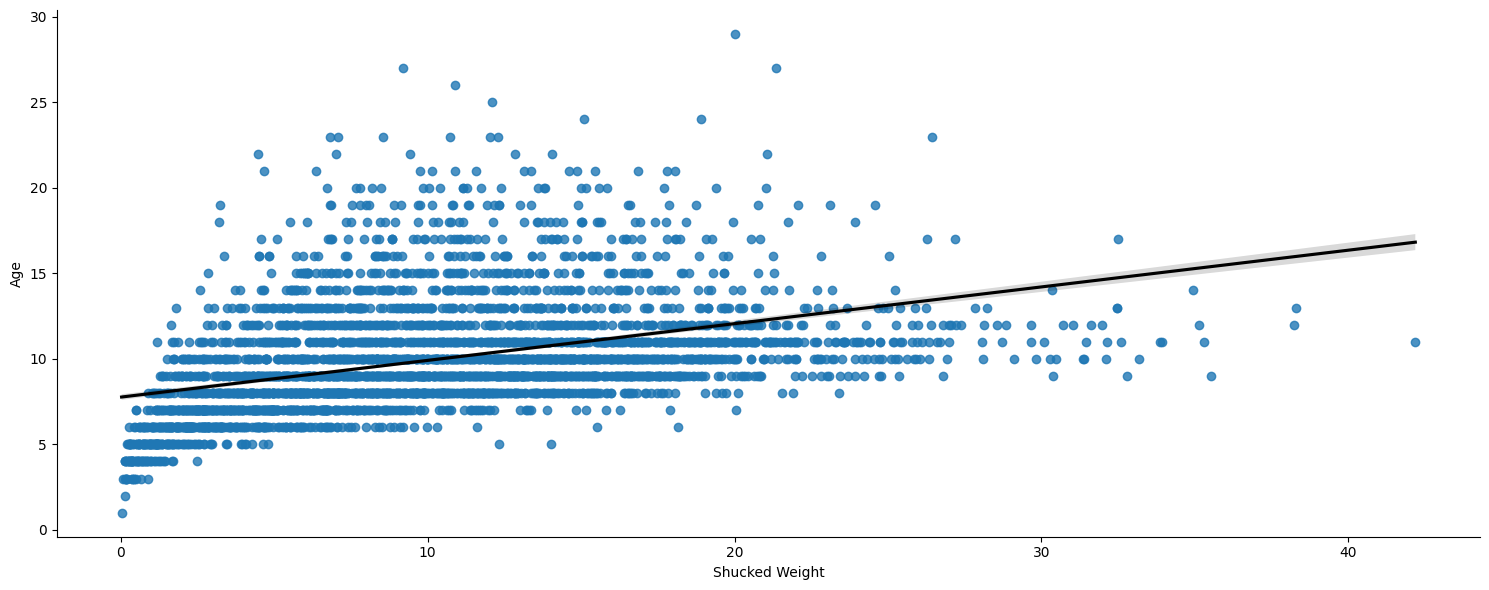

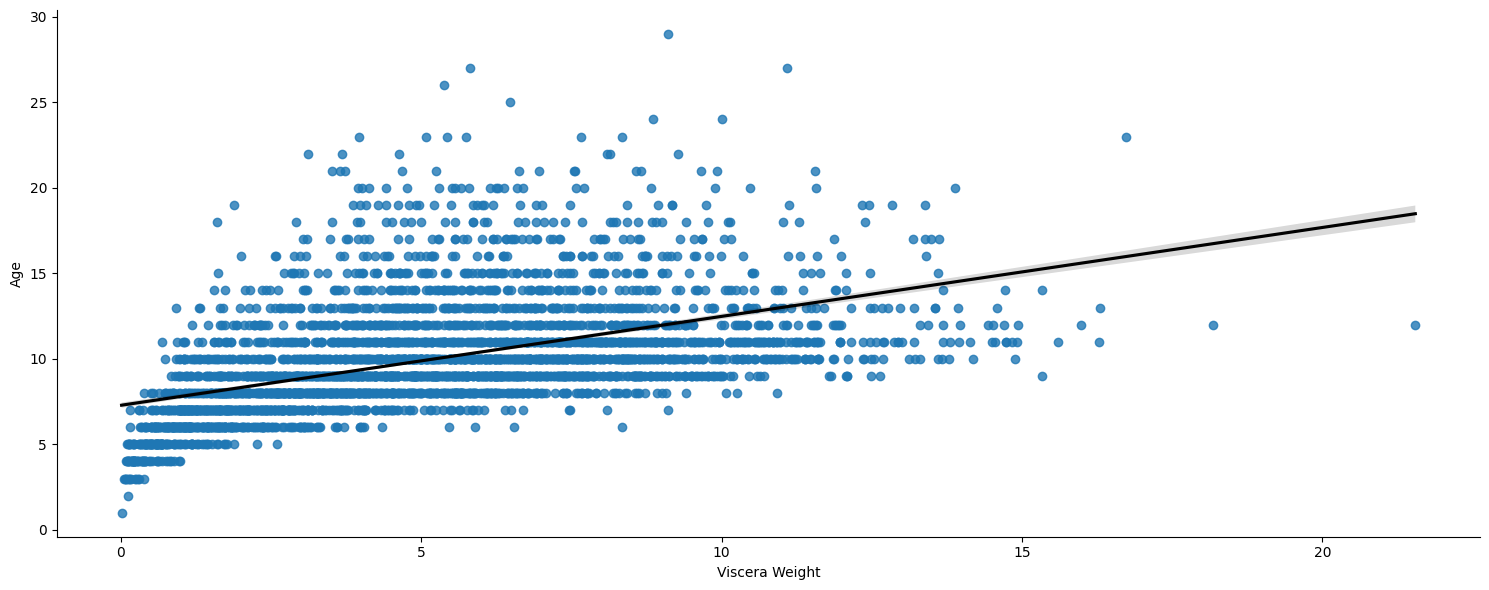

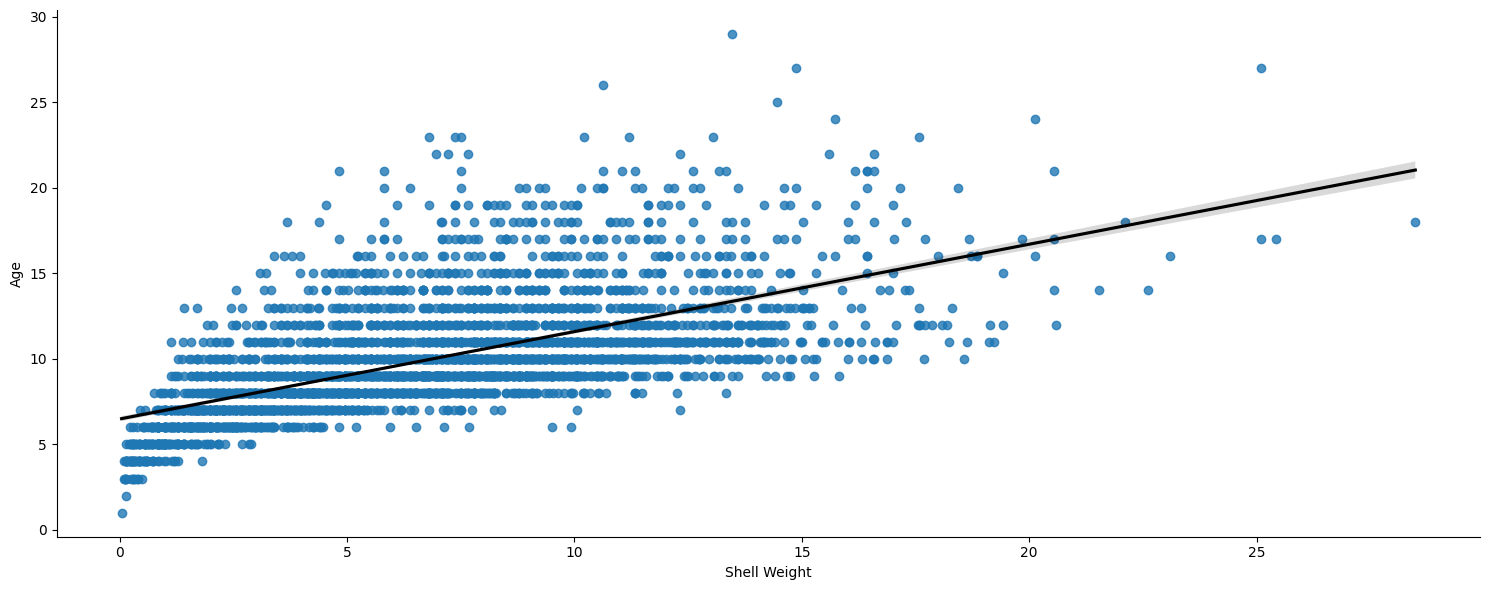

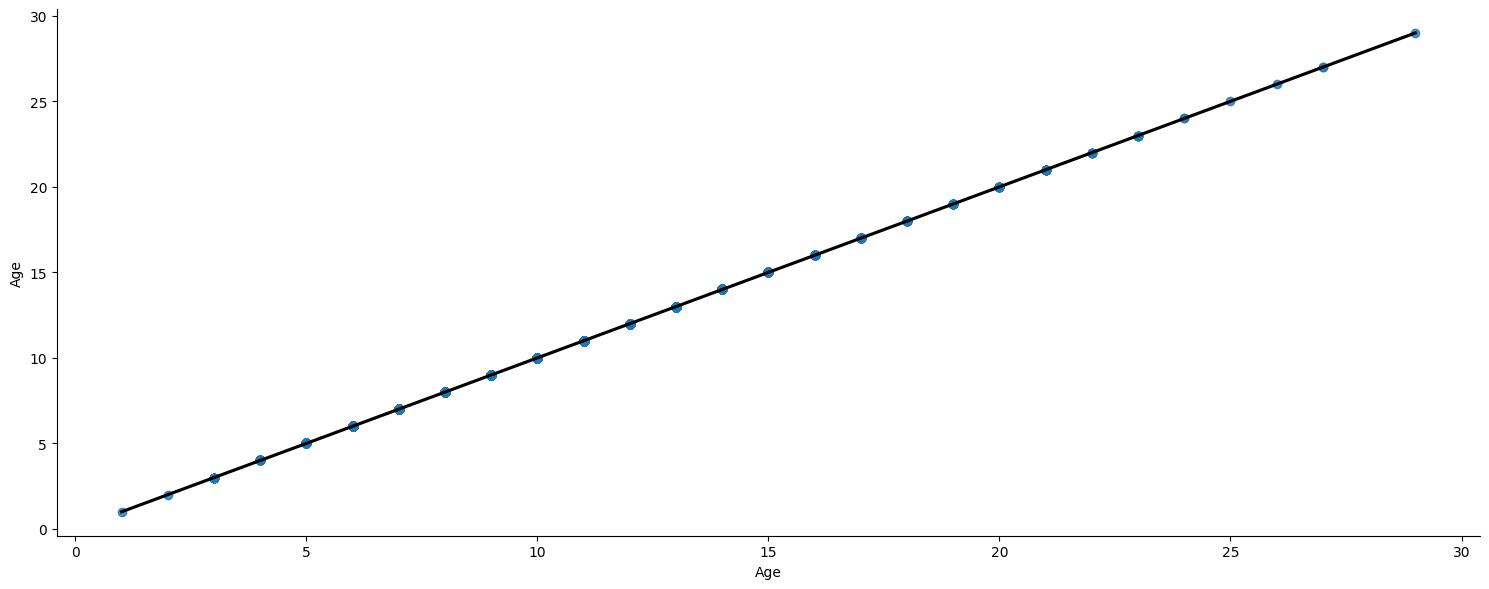

In [38]:
for f in numeric:
    sns.lmplot(data=data,x=f,y="Age",line_kws={"color":"black"},height=6,aspect=2.5)

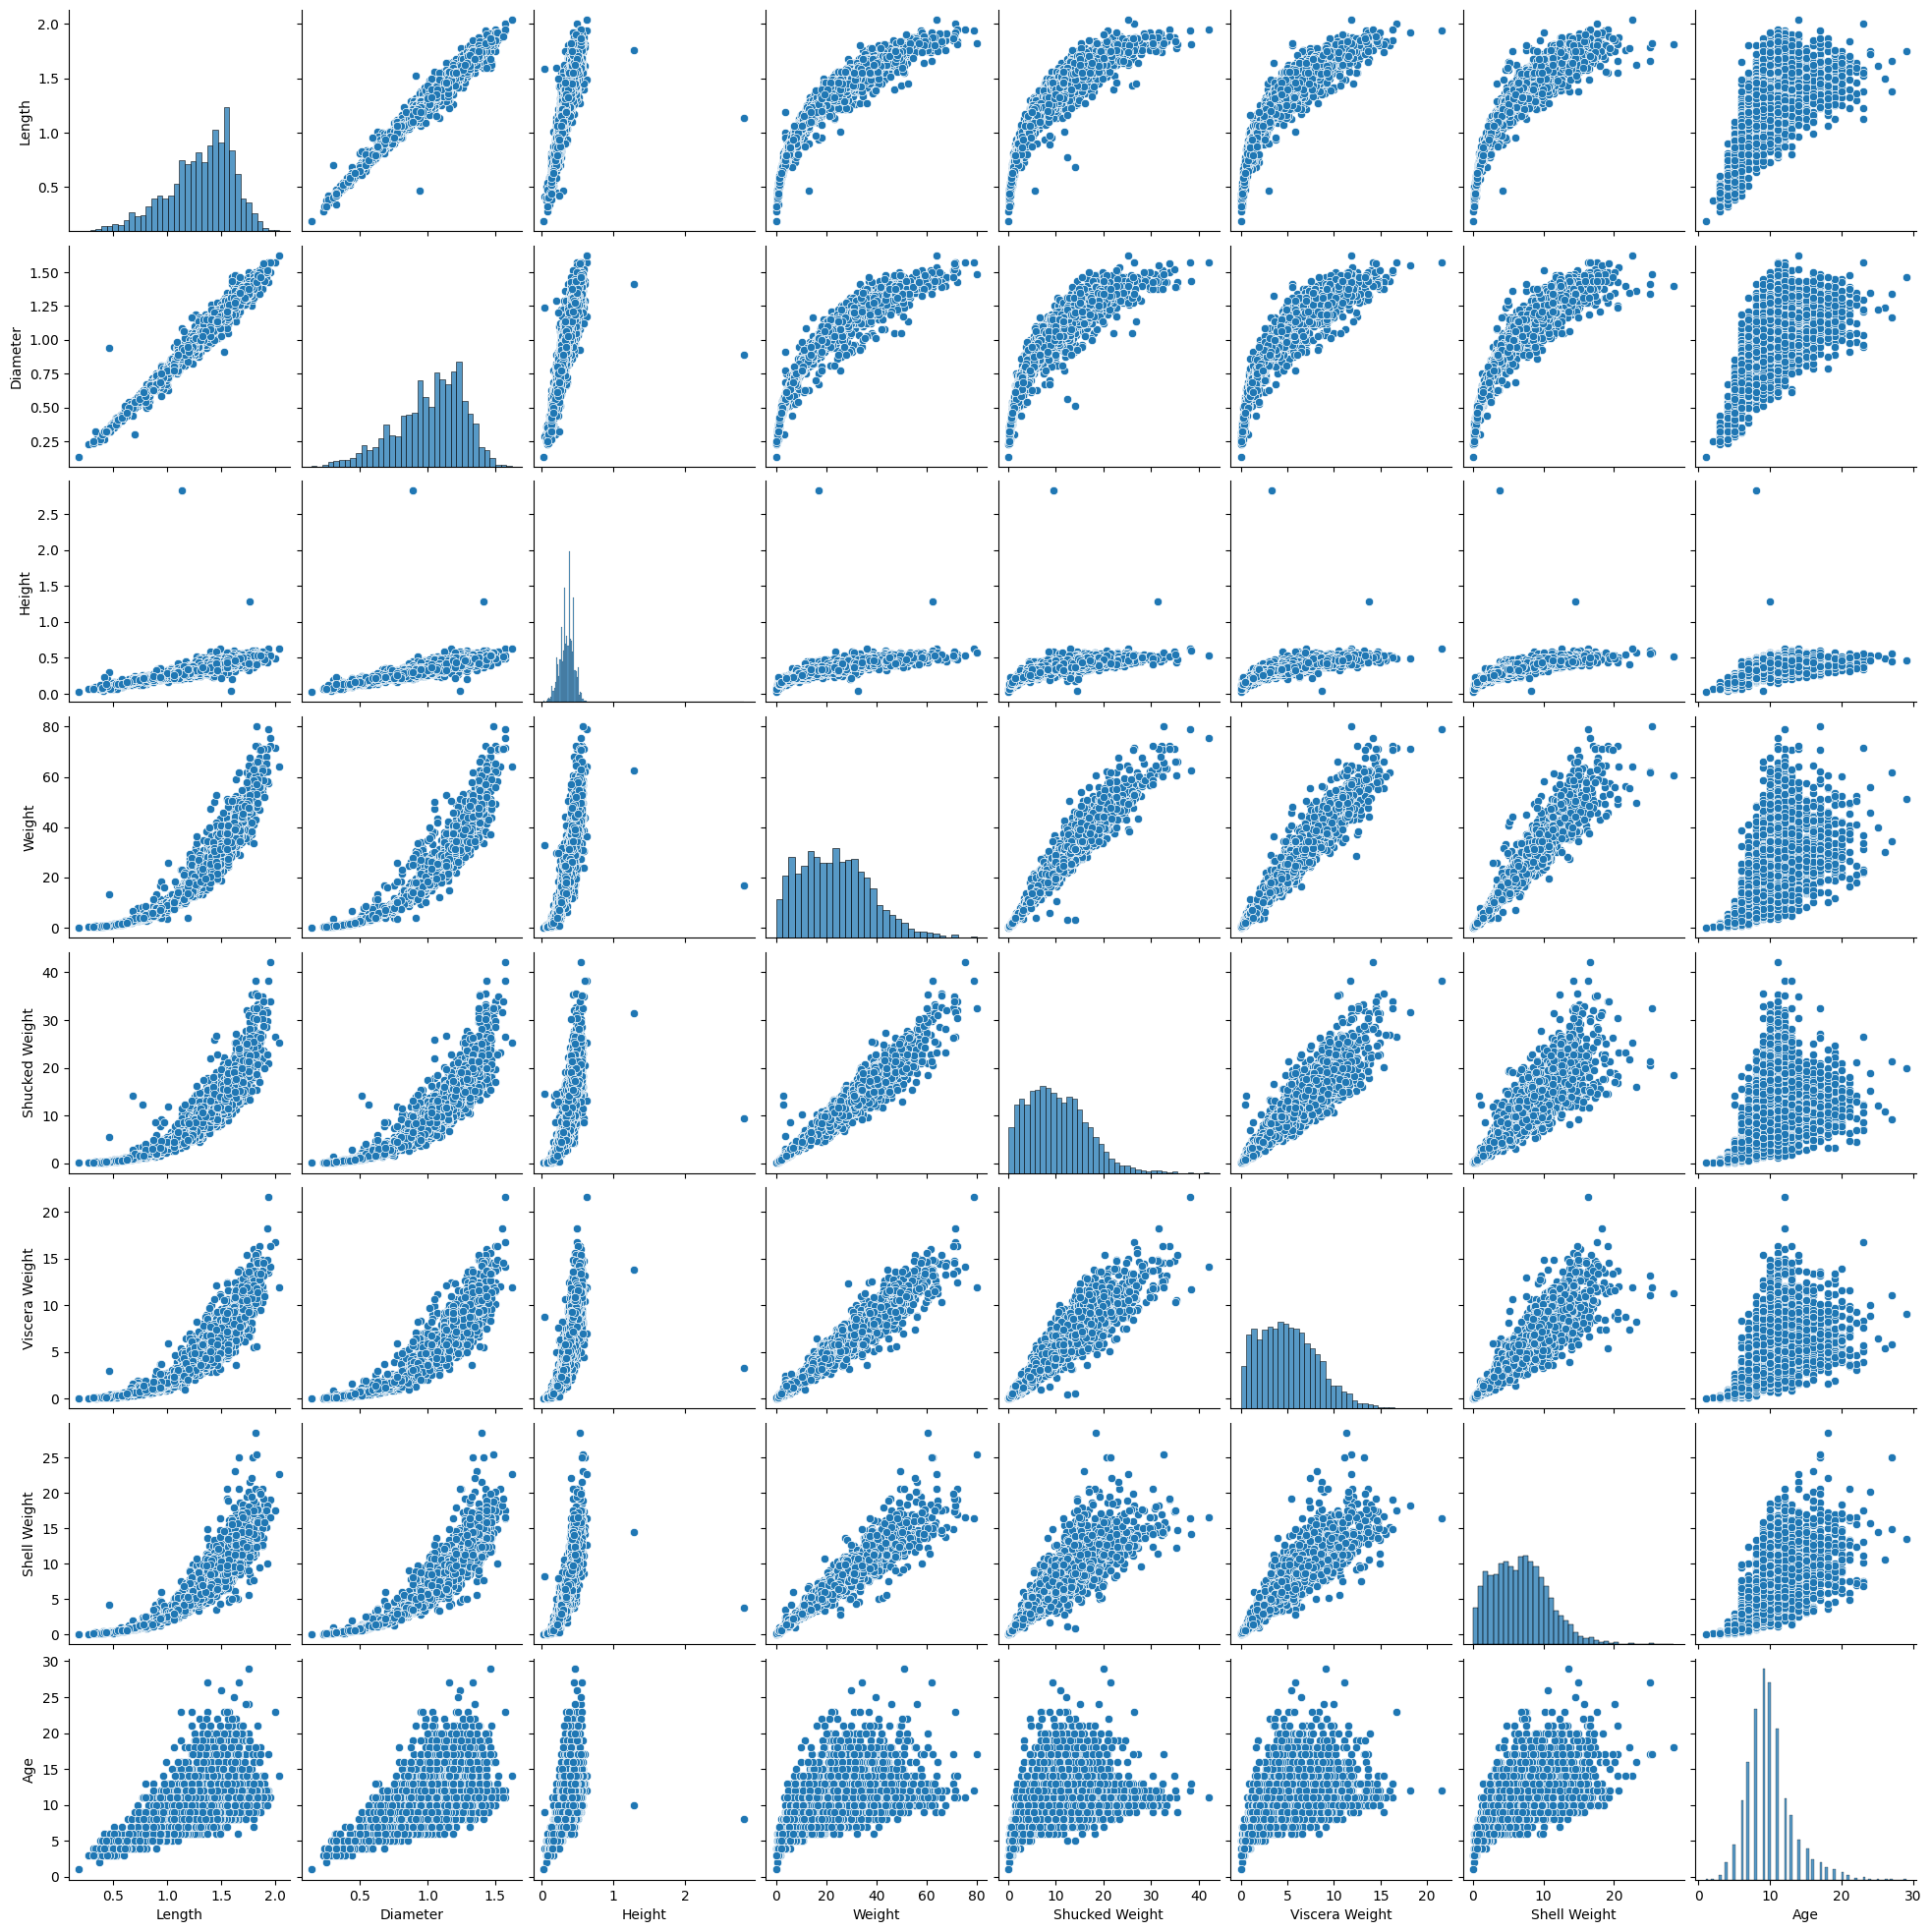

In [39]:
sns.pairplot(data,)

In [40]:
# Feature Encoding
# Feature Scaling
# Train Test Split
# Normalize Variance
# Feature Selection
# Model Evaluation

In [41]:
en = pd.get_dummies(data["Sex"],drop_first=True).astype(int)
data = pd.concat((data,en),axis=1)

In [42]:
data.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,I,M
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9,0,0
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6,0,1
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6,1,0
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10,0,0
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6,1,0


In [43]:
data.drop("Sex",axis=1,inplace=True)

In [44]:
x = data.iloc[:,[i for i,x in enumerate(data.columns) if x != "Age"]]

In [45]:
x.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,I,M
0,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,0,0
1,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,0,1
2,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,1,0
3,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,0,0
4,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,1,0


In [46]:
y = data["Age"]

In [47]:
sc = StandardScaler()

In [48]:
x_scaled = sc.fit_transform(x)

In [49]:
x = pd.DataFrame(x_scaled,columns=sc.get_feature_names_out())

In [50]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [51]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [52]:
lr.score(x_test,y_test)

0.5439925052423111

In [56]:
lr2 = LinearRegression()
pf = PolynomialFeatures()
p_x_train = pf.fit_transform(x_train)
p_x_test = pf.transform(x_test)
lr2.fit(p_x_train,y_train)
lr2.score(p_x_test,y_test)

0.5687177252516326

In [57]:
cross_val_score(lr,x_train,y_train,cv=10)

array([0.52289891, 0.56344483, 0.5801294 , 0.51092598, 0.56317874,
       0.40773387, 0.54250401, 0.54163405, 0.33737258, 0.52665736])

In [58]:
gbr = GradientBoostingRegressor()

In [59]:
acc = []
for i in range(1,x_train.columns.shape[0]+1):
    skb = SelectKBest(mutual_info_regression,k=i)
    skb.fit(x_train,y_train)
    sel_x_train = skb.transform(x_train)
    sel_x_test = skb.transform(x_test)
    gbr.fit(sel_x_train,y_train)
    pred = gbr.predict(sel_x_test)
    acc.append(r2_score(y_test,pred))

In [60]:
acc

[0.426197460000761,
 0.4866013075676484,
 0.4994347178645908,
 0.5042021045264615,
 0.4985662450782593,
 0.4923391132063476,
 0.5404260511175798,
 0.540798634149221,
 0.5407457992209388]

In [61]:
gbr2 = GradientBoostingRegressor()

In [63]:
cross_val_score(gbr2,x_train,y_train)

array([0.54951602, 0.57148007, 0.53682748, 0.53441053, 0.50127817])

<Axes: >

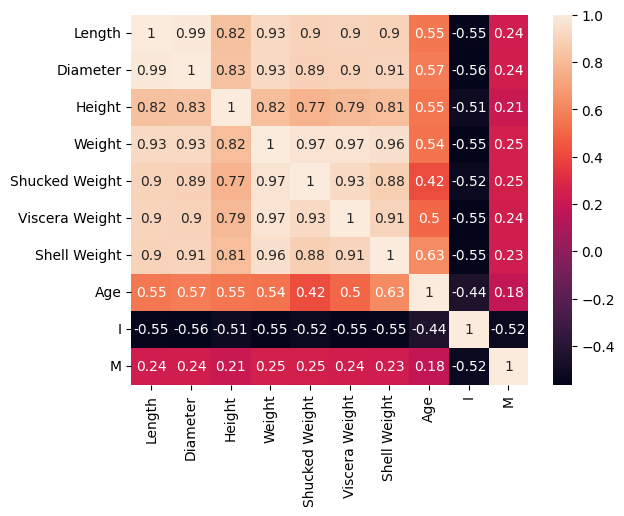

In [64]:
sns.heatmap(data.corr(),annot=True)

In [67]:
data

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,I,M
0,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9,0,0
1,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6,0,1
2,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6,1,0
3,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10,0,0
4,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6,1,0
...,...,...,...,...,...,...,...,...,...,...
3886,1.4625,1.1375,0.3250,24.819987,11.651644,5.854172,6.378637,8,0,0
3887,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10,0,0
3888,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5,1,0
3889,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976698,6,1,0


In [68]:
rf = RandomForestRegressor()

In [69]:
acc = []
for i in range(1,x_train.columns.shape[0]+1):
    skb = SelectKBest(mutual_info_regression,k=i)
    skb.fit(x_train,y_train)
    sel_x_train = skb.transform(x_train)
    sel_x_test = skb.transform(x_test)
    rf.fit(sel_x_train,y_train)
    pred = rf.predict(sel_x_test)
    acc.append(r2_score(y_test,pred))

In [70]:
acc

[0.4154729943063209,
 0.32534458620071194,
 0.4211263874112996,
 0.4551558139761036,
 0.4484610354037952,
 0.4685042645333195,
 0.5176467179689981,
 0.5357185054684309,
 0.5322804770209207]

In [71]:
rf2 = RandomForestRegressor()
cross_val_score(rf2,x_train,y_train)

array([0.5310877 , 0.55636416, 0.53596354, 0.51244162, 0.50348056])

In [72]:
xgb = XGBRegressor()

In [73]:
cross_val_score(xgb,x_train,y_train)

array([0.47324615, 0.49227424, 0.49834021, 0.51494052, 0.40491425])

In [180]:
# Try to predict the indeterminate Gender